In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

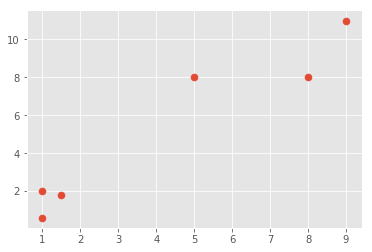

In [2]:
X = np.array([[1,2],
              [1.5,1.8],
              [5,8],
              [8,8],
              [1,0.6],
              [9,11]])

plt.scatter(X[:,0],X[:,1], s = 50)
plt.show()

colors = 10*['g','r','c','b','k']

In [12]:


#define  our class

class K_Means:
    def __init__(self,k=2,tol=0.001,max_iter=300):
        self.k = k  #Choose value for K
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self,data):
        self.centroids = {} #dictionary to hold our cenroids
        
        for i in range(self.k):          #Randomly select K featuresets to start as your centroids
            self.centroids[i] = data[i]  #randomly assign 2 centroids to be our first two data points
            
        for i in range(self.max_iter):
            self.classifications = {}  #dictionary to hold classifications
            
            for i in range(self.k):  #creates two groups of classifications i.e. classification[0] and classification [1]
                self.classifications[i] = []
            
            #calculates distances of the features to the current centroids and classify them
                #distance: featureset value - centroid value for all our centroids
                #classificaion: we classify our featureset as the same classification as the centroid 
                #closest to it by taking the minimum distance from it and the centroids
                #norm gets distance between two vectors
                #self.classifcation[classification]: for that classification add the current featureset
                # to a list so we end up with two list of all featureset(points) that belong to one
                # classification and another list of points that belong to the other classification
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances)) 
                self.classifications[classification].append(featureset)
            
            #store the all centroids to compare them later
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
                #pass
                #gets a new set of cenroids by using he average points of each list of points for
                #each featureset
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
            
            
            optimized = True #assume optimized
            
            for c in self.centroids: 
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                #now verify our centroid is accurate by comparing the prior and previous centroids to 
                # our tolerance to make sure it is less than our tolerance
                # we are using the relative error 
                if np.sum((current_centroid - original_centroid)/original_centroid * 100.0) > self.tol:
                    optimized = False
            #exit once you have obtained centroids within our tolerance
            if optimized:
                break
        
    
    def predict(self,data):
        #gets the distance between our data and the centroids to see which one is close
        #and classifies them to whichever centroid is the closest
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances)) 
        return classification
    

In [13]:
clf = K_Means()

In [14]:
clf.fit(X)  #train our model

In [27]:
#plot our centroids
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], 
                marker="o",color="k", s=60,linewidths=5)
    
# plot for classification in clf.classifications:    
for classification in clf.classifications:
    color=colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1], marker='x', color=color, s=150,linewidths = 5)

unknowns = np.array([[1,3],
                     [5,5],
                     [6,6],
                     [7,7],
                     [1,1]])
#predicts unknown data points based on how close they are to our centroids from k-means analysis
for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0],unknown[1],marker="*",color =colors[classification],s = 60, linewidths=1)

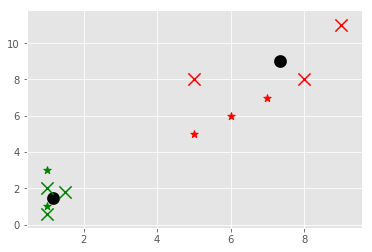

In [28]:
plt.show()